In [62]:
import msprime
import numpy as np
import sys
from IPython.display import SVG
%load_ext rpy2.ipython
# %reload_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [63]:
%%R

library(tidyverse)

In [64]:
%%R

tab <- tibble()
for (sim in 1:20) {
    for (rho in c('0.0001', '0.0005', '0.001', '0.005', '0.01', '0.05', '0.1', '0.5')) {
        for (tht in c('0.0001', '0.0005', '0.001', '0.005', '0.01', '0.05', '0.1', '0.5')) {
            tab <- read_csv(paste0('../steps/01_msprime_simulations/sim', sim, '_rho', rho, '_tht', tht, '.csv'),
                           show_col_types = FALSE) %>%
                mutate(
                    sim = sim,
                    rho = rho,
                    tht = tht
                ) %>%
                bind_rows(tab)
        }
    }
}

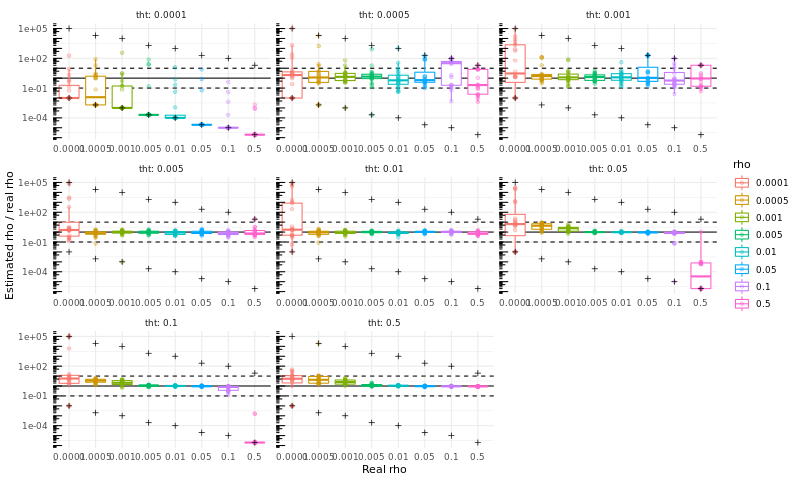

In [65]:
%%R -w 800

tab %>%
    group_by(sim, rho, tht) %>%
    filter(step == which.max(step)) %>%
    ungroup() %>%
    ggplot() +
    geom_hline(aes(yintercept = 1)) +
    # geom_hline(aes(yintercept = y), data = tibble(y=c(0.5, 2))) +
    geom_hline(aes(yintercept = y), linetype = 2, data = tibble(y=c(0.1, 10))) +
    geom_boxplot(aes(
        rho, 
        par1/as.numeric(rho),
        color = rho),
        outlier.shape = NA) +
    geom_point(aes(
        rho, 
        par1/as.numeric(rho),
        color = rho), 
        alpha = 0.3) +
    geom_point(aes(x, y), shape = 3,
               data = 
               tibble(
                   x = c('0.0001', '0.0005', '0.001', '0.005', '0.01', '0.05', '0.1', '0.5'),
                   y = 0.000001/as.numeric(x))) +
    geom_point(aes(x, y), shape = 3,
               data = 
               tibble(
                   x = c('0.0001', '0.0005', '0.001', '0.005', '0.01', '0.05', '0.1', '0.5'),
                   y = 10/as.numeric(x))) +
    facet_wrap(~tht, scales = 'free_x', labeller = label_both) +
    scale_y_log10() +
    annotation_logticks(sides = 'l') +
    theme_minimal() +
    ylab('Estimated rho / real rho') +
    xlab('Real rho')

The above plots show the estimated rho relative to the real rho used in the simulations for different values of theta. The continuous horizontal line intersects at 1, and dashed lines represent a 10-fold increase or decrease in the relative rho. Crosses represent the upper and lower limits of the optimization.

We can see that, when theta is small, rho is greately underestimated, and it appears to be snapped to the minimum value. This might be because there are not enough mutations to fir the model correctly. In more intermediate theta values (0.001-0.01), the rho values are estimated correctly.

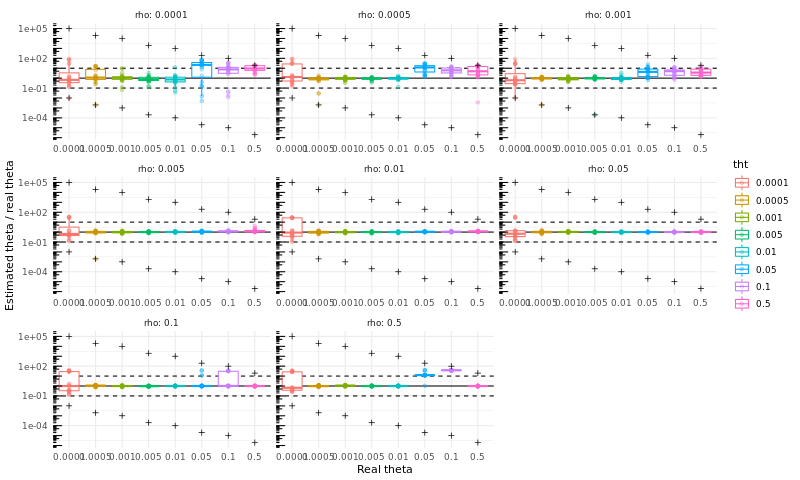

In [66]:
%%R -w 800

tab %>%
    group_by(sim, rho, tht) %>%
    filter(step == which.max(step)) %>%
    ungroup() %>%
    ggplot() +
    geom_hline(aes(yintercept = 1)) +
    geom_hline(aes(yintercept = y), linetype = 2, data = tibble(y=c(0.1, 10))) +
    geom_boxplot(aes(tht, 
                   par2/as.numeric(tht),
                   color = tht),
                 outlier.shape = NA) +
    geom_point(aes(tht, 
                   par2/as.numeric(tht),
                   color = tht), 
        alpha = 0.3) +
    geom_point(aes(x, y), shape = 3,
               data = 
               tibble(
                   x = c('0.0001', '0.0005', '0.001', '0.005', '0.01', '0.05', '0.1', '0.5'),
                   y = 0.000001/as.numeric(x))) +
    geom_point(aes(x, y), shape = 3,
               data = 
               tibble(
                   x = c('0.0001', '0.0005', '0.001', '0.005', '0.01', '0.05', '0.1', '0.5'),
                   y = 10/as.numeric(x))) +
    facet_wrap(~rho, scales = 'free_x', labeller = label_both) +
    scale_y_log10() +
    annotation_logticks(sides = 'l') +
    theme_minimal()+
    ylab('Estimated theta / real theta') +
    xlab('Real theta')

The above plots show the estimated theta relative to the real theta used in the simulations for different values of rho. The continuous horizontal line intersects at 1, and dashed lines represent a 10-fold increase or decrease in the relative theta. Crosses represent the upper and lower limits of the optimization.

Theta is generally well estimated for low to intermediate values (0.0001-0.01). For small values of 

In [ ]:
%%R

tab %>%
    group_by(sim, rho, tht) %>%
    filter(step == which.max(step))

# A tibble: 1,280 × 9
# Groups:   sim, rho, tht [1,280]
    step    par1      par2      fn         gr1         gr2   sim rho   tht   
   <dbl>   <dbl>     <dbl>   <dbl>       <dbl>       <dbl> <int> <chr> <chr> 
 1    22 0.428   0.492     57644.     0.000207    0.00159     20 0.5   0.5   
 2    16 0.00726 1         30531.     0.00694  -221.          20 0.5   0.1   
 3    20 0.00001 0.643     19537.  7154.         -0.000165    20 0.5   0.05  
 4    11 0.220   0.00986    5463.    -0.00103     0.152       20 0.5   0.01  
 5    30 0.337   0.00481    3032.    -0.0169      0.332       20 0.5   0.005 
 6    38 0.120   0.000964    761.    -0.171       8.51        20 0.5   0.001 
 7    17 0.00001 0.0149      343.  2076.          0.000112    20 0.5   0.0005
 8    52 0.00001 0.0000210    73.2 9208.       4342.          20 0.5   0.0001
 9    21 0.0915  0.499     55227.    -0.0224      0.00169     20 0.1   0.5   
10    35 0.0764  0.0996    28142.    -0.00534    -0.0401      20 0.1   0.1   
# … with

In [31]:
%%R

tab %>%
    group_by(sim, rho, tht) %>%
    filter(step == which.max(step), rho == 0.5) %>%
    select(sim, step, par1, rho, par2, tht, everything()) %>%
    print(n = 1)

# A tibble: 160 × 9
# Groups:   sim, rho, tht [160]
      sim  step      par1 rho        par2 tht         fn      gr1      gr2
    <int> <dbl>     <dbl> <chr>     <dbl> <chr>    <dbl>    <dbl>    <dbl>
  1    20    22 0.428     0.5   0.492     0.5    57644.   2.07e-4  1.59e-3
  2    20    16 0.00726   0.5   1         0.1    30531.   6.94e-3 -2.21e+2
  3    20    20 0.00001   0.5   0.643     0.05   19537.   7.15e+3 -1.65e-4
  4    20    11 0.220     0.5   0.00986   0.01    5463.  -1.03e-3  1.52e-1
  5    20    30 0.337     0.5   0.00481   0.005   3032.  -1.69e-2  3.32e-1
  6    20    38 0.120     0.5   0.000964  0.001    761.  -1.71e-1  8.51e+0
  7    20    17 0.00001   0.5   0.0149    0.0005   343.   2.08e+3  1.12e-4
  8    20    52 0.00001   0.5   0.0000210 0.0001    73.2  9.21e+3  4.34e+3
  9    19    22 0.461     0.5   0.503     0.5    59432.  -3.72e-4 -4.21e-3
 10    19    23 0.00508   0.5   1         0.1    30936.  -3.01e-1 -4.95e+2
 11    19    30 0.000969  0.5   0.631     0.05  